In [1]:
from typing import Set


from solver import BTSPSolverSAT
from util import random_points, draw_edges

In [2]:
%load_ext autoreload
%autoreload 2

New best bottleneck: 6104.838900413343!
The bottleneck 4724.138122451544 is infeasible!
The bottleneck 5654.902032749993 is infeasible!
New best bottleneck: 5860.2220094464!
The bottleneck 5816.769034438276 is infeasible!
The bottleneck 5823.725439956798 is infeasible!


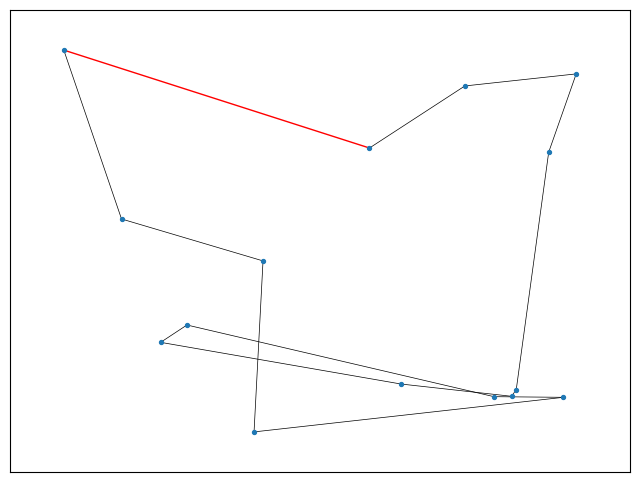

In [6]:
points = random_points(15)
solver = BTSPSolverSAT(points, 2)
edges = solver.solve()
draw_edges(edges)